# SVM Algorithm 

## Importing the Libraries and the Data

In [17]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from pandas import DataFrame


from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score,
    confusion_matrix, ConfusionMatrixDisplay
)

In [19]:
df = pd.read_csv('HIGGS_8K.csv',header=None)   #we fix once again the problematic value
df.head()
print(f'String value: {df.iloc[0,17]} (type: {type(df.iloc[0, 17])})')
df.iloc[:, 17] = pd.to_numeric(df.iloc[:, 17], errors='coerce').fillna(0) 
print(f'Fixed value: {df.iloc[0, 17]} (type: {type(df.iloc[0, 17])})')

String value: 0.000000000000000000e+00.1 (type: <class 'str'>)
Fixed value: 0.0 (type: <class 'float'>)


In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,0.0,1.630428,0.404143,0.401026,2.722409,0.355644,1.362199,0.015818,-1.174111,0.000000,...,0.387635,1.596321,1.550981,0.859235,0.827233,0.995416,0.764766,0.520597,0.850413,0.929865
2,1.0,0.326305,-0.797735,0.223471,1.248234,-1.427857,0.923767,-0.278280,-0.470052,0.000000,...,-0.426866,1.153501,0.000000,0.887944,0.924601,0.987189,0.854094,0.385013,0.789912,0.724627
3,1.0,1.381170,0.521993,0.574698,0.357347,0.037136,0.413057,-0.607036,-1.308270,0.000000,...,0.567525,-1.475778,0.000000,0.936186,1.107217,0.983808,0.693327,0.562045,0.825387,0.846233
4,1.0,0.304161,-0.736375,0.686225,0.477172,-1.274736,0.907003,0.324770,-0.463954,2.173076,...,0.904818,1.165154,0.000000,1.181790,1.033701,0.993943,0.648399,0.936097,0.732592,0.661779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7996,1.0,0.835437,0.087603,-0.254367,0.565305,0.647809,0.488175,1.169436,1.527465,0.000000,...,0.632485,-0.704450,1.550981,0.566228,1.016260,0.983104,0.587913,0.661417,0.670422,0.641382
7997,0.0,0.817685,-0.189004,-1.441773,0.259808,-0.360375,1.600286,1.249645,-0.146851,2.173076,...,-0.765825,1.250610,0.000000,0.926674,1.004506,0.983705,1.954265,0.962375,1.358500,1.227740
7998,1.0,0.425313,0.888205,0.363851,0.573086,1.279933,1.639952,-1.225930,0.082208,0.000000,...,1.210464,-0.117351,0.000000,1.002153,1.521563,0.988448,0.813080,0.786715,1.202513,1.663360
7999,0.0,1.359575,-1.438606,-0.095677,0.524665,0.918297,1.181000,0.935742,-1.345968,1.086538,...,-0.107062,-1.701072,0.000000,0.814407,0.920867,0.987094,2.352376,1.146577,1.479682,1.433999


In [23]:
classification=df.iloc[:,0]
low_level=df.iloc[:,1:22]
high_level=df.iloc[:,22:]

## Low Level

In [27]:

low_level_train, low_level_test, classification_train, classification_test = train_test_split(
    low_level, classification, test_size=0.20, random_state=42)   #splitting the data
scaler = StandardScaler()   #scaling the features
low_level_train_scaled = scaler.fit_transform(low_level_train)
low_level_test_scaled = scaler.transform(low_level_test)
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(low_level_train_scaled, classification_train)

SVC(kernel='linear', probability=True, random_state=0)

In [29]:
low_level_test_pred = classifier.predict(low_level_test_scaled)

In [31]:
cm = confusion_matrix(classification_test, low_level_test_pred)
print(cm)
accuracy_score(classification_test, low_level_test_pred)

[[335 436]
 [247 583]]


0.5733916302311055

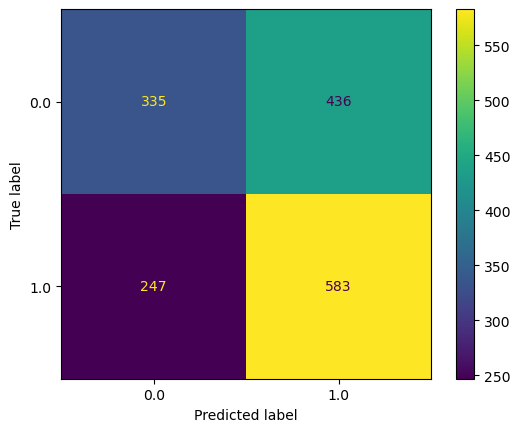

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

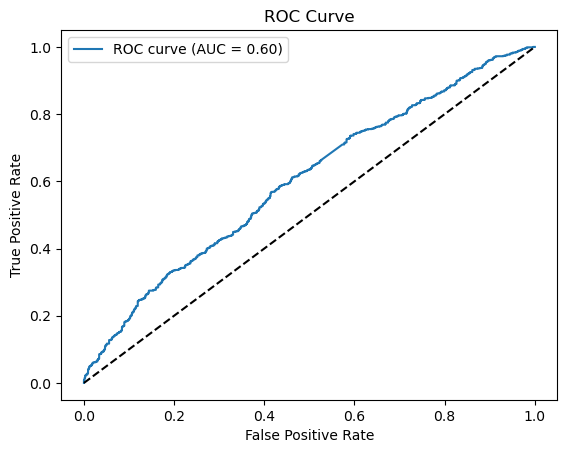

In [35]:
y_proba = classifier.predict_proba(low_level_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(classification_test, y_proba)
auc = roc_auc_score(classification_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # random chance line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### We can try to change the Kernel from linear to rbf in order to seperate the data in a non linear method to see if this fixes the results

[[431 340]
 [298 532]]
Accuracy: 0.6014990630855716
              precision    recall  f1-score   support

         0.0       0.59      0.56      0.57       771
         1.0       0.61      0.64      0.63       830

    accuracy                           0.60      1601
   macro avg       0.60      0.60      0.60      1601
weighted avg       0.60      0.60      0.60      1601

AUC: 0.6387854921632055


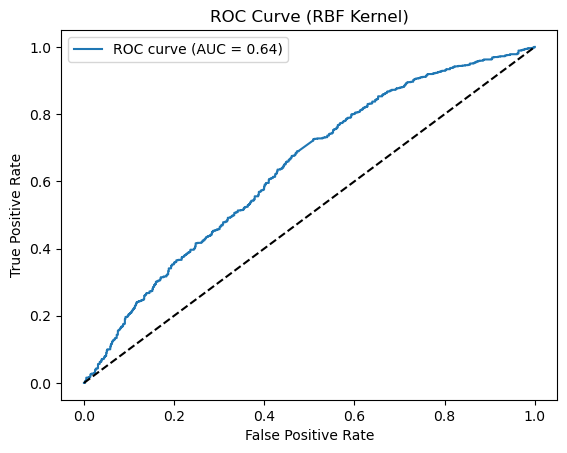

In [47]:
classifier = SVC(kernel='rbf', C=10, gamma='scale', probability=True)

classifier.fit(low_level_train_scaled, classification_train)
low_level_test_pred = classifier.predict(low_level_test_scaled)

# Evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

# Confusion matrix
cm = confusion_matrix(classification_test, low_level_test_pred)
print(cm)

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(classification_test, low_level_test_pred))

# Classification report
print(classification_report(classification_test, low_level_test_pred))

# AUC & ROC curve
y_proba = classifier.predict_proba(low_level_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(classification_test, y_proba)
auc = roc_auc_score(classification_test, y_proba)
print("AUC:", auc)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (RBF Kernel)')
plt.legend()
plt.show()


### Since the results are only 3% improved there is no vivid reason to do this model (in importand data sets even a slight improve like this might be desired but here there is nothing serious to keep as an intuitive way to understand ml methods .We just continue to the high level

## High Level

In [54]:
high_level_train, high_level_test, classification_train, classification_test = train_test_split(
    high_level, classification, test_size=0.20, random_state=42)   #splitting the data
scaler = StandardScaler()   #scaling the features
high_level_train_scaled = scaler.fit_transform(high_level_train)
high_level_test_scaled = scaler.transform(high_level_test)
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)
classifier.fit(high_level_train_scaled, classification_train)

SVC(kernel='linear', probability=True, random_state=0)

In [56]:
high_level_test_pred = classifier.predict(high_level_test_scaled)

In [58]:
cm = confusion_matrix(classification_test, high_level_test_pred)
print(cm)
accuracy_score(classification_test, high_level_test_pred)

[[278 493]
 [113 717]]


0.6214865708931917

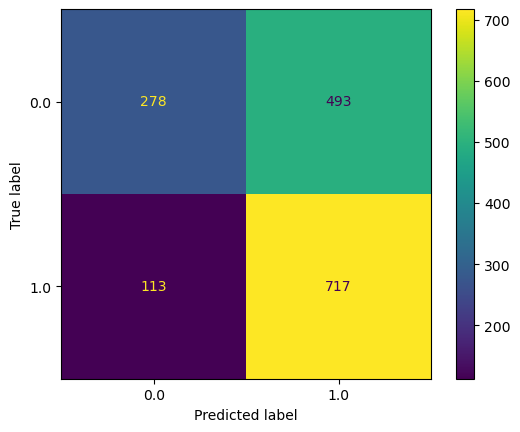

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
disp.plot()
plt.show()

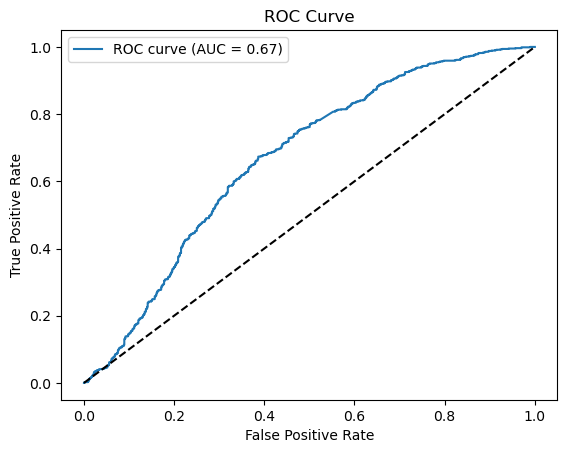

In [62]:
y_proba = classifier.predict_proba(high_level_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(classification_test, y_proba)
auc = roc_auc_score(classification_test, y_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
